In [1]:
from keras.models import load_model
model = load_model('Cats_and_dogs_v2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [2]:
imgPath = '/home/noah/Datasets/CatDog/train/cat.1.jpg'
from keras.preprocessing import image
import numpy as np


img = image.load_img(imgPath, target_size = (150,150))
img = image.img_to_array(img)
print(img.shape)
img = np.expand_dims(img,axis=0)
img = img/255.0
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


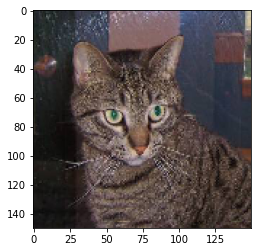

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img[0])
plt.show()

In [4]:
from keras import models

layerOutputs = [layer.output for layer in model.layers[:8]]      #Outputs of each layer of first 8 
activationMod = models.Model(inputs=model.input, outputs = layerOutputs)       #Allows to analyze in between NN


#1 input 8 outputs

In [5]:
activations = activationMod.predict(img)    #list of activaton  of each layer
firstLayerAct = activations[0]
firstLayerAct.shape

(1, 148, 148, 32)

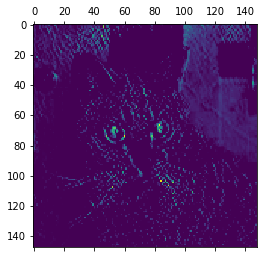

In [6]:
plt.matshow(firstLayerAct[0,:,:,4], cmap = 'viridis')     #[sample num, y, x, filter num]

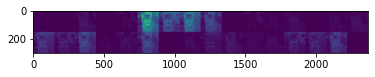

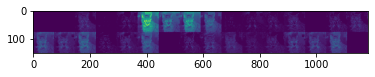

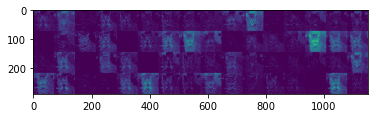

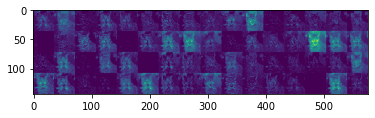

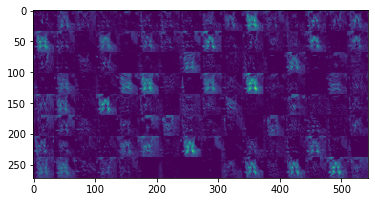

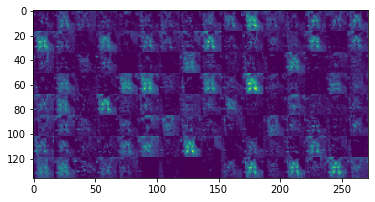

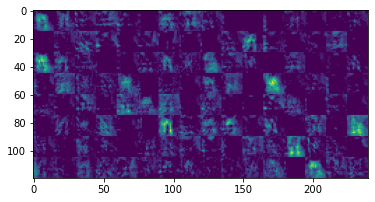

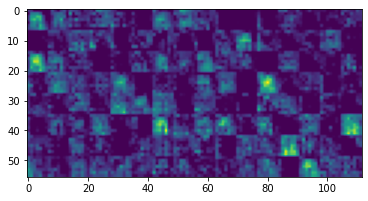

<Figure size 432x288 with 0 Axes>

In [31]:
layerNames = []
for layer in model.layers[:8]:
    layerNames.append(layer.name)

imgPerRow = 16

for layer, activation in zip(layerNames, activations):
    nFeatures = activation.shape[-1]
    nRow = nFeatures//imgPerRow
    size = activation.shape[1]
    pltGrid = np.zeros((size*nRow,size*imgPerRow))
    for row in range(nRow):
        for col in range(imgPerRow):
            channelImg = activation[0,:,:,row*imgPerRow+col]
            pltGrid[row*size:(row+1)*size, size*col:size*(col+1)] = channelImg
    
    
    plt.imshow(pltGrid, cmap = 'viridis')
    plt.figure()